# Time Series Forecast
This notebook works to predict the bitcoin price index using time series analysis.

In [1]:
import pandas as pd
import numpy as np
import datapungi_fed as dpf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [5]:
bit = dpf('CBBTCUSD')

In [23]:
bit.columns = ['price']

## ARIMA 

In [2]:
from scipy import stats
import statsmodels.api as sm
from itertools import product
from datetime import datetime

In [24]:
bit_month = bit.resample('M').mean()
bit_year = bit.resample('A-DEC').mean()
bit_q = bit.resample('Q-DEC').mean()

### Seasonal Decomposition 

In [25]:
result = sm.tsa.seasonal_decompose(bit_month.price)

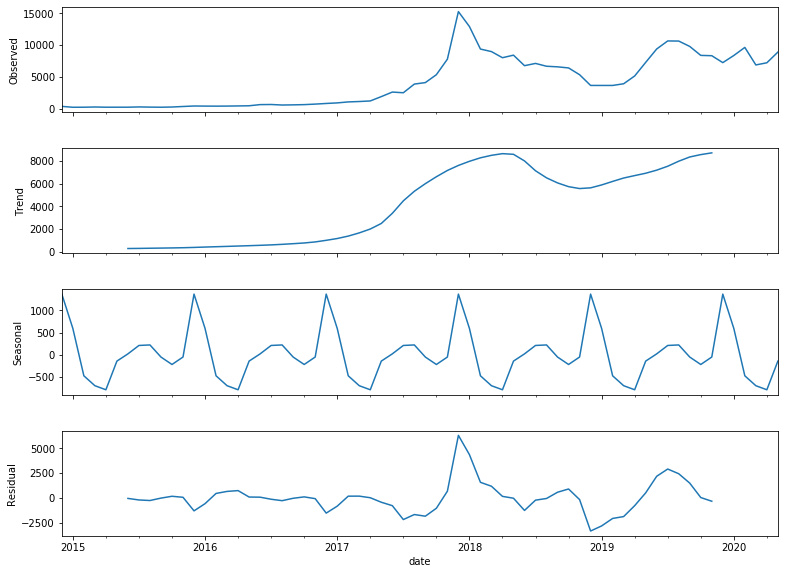

In [29]:
#plt.figure(figsize = (15, 7))
result.plot()
plt.gcf().set_size_inches(12, 9)

In [28]:
print("Dickey–Fuller test: p=%f" %sm.tsa.stattools.adfuller(bit_month.price)[1])

Dickey–Fuller test: p=0.465340


## Prophet

In [8]:
from fbprophet import Prophet

In [12]:
# format the data to the requirement of the prophet requirement, ds for datetime and y for price index
bit = bit.reset_index()
bit.columns = ['ds', 'y']

In [17]:
bit.head()

,ds,y
0,2014-12-01,370.0
1,2014-12-02,378.0
2,2014-12-03,378.0
3,2014-12-04,377.1
4,2014-12-06,378.0


In [28]:
bit['ds'].min(), bit['ds'].max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-04-28 00:00:00'))

In [18]:
# initiate a prophet object to fit the data
m = Prophet()
m.fit(bit)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/liwenhuang/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
# make a future prediction the next month
future = m.make_future_dataframe(periods = 30)
future.tail() # note that the original data set only has 1941 rows, 30 new rows have been added

,ds
1967,2020-05-24
1968,2020-05-25
1969,2020-05-26
1970,2020-05-27
1971,2020-05-28


In [ ]:
forecast = m.predict(future)

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
1932,2020-04-19,8560.986681,6922.375276,10256.002390
1933,2020-04-20,8603.101626,6901.932242,10229.626878
1934,2020-04-21,8634.586553,6973.409264,10330.801119
1935,2020-04-22,8671.656324,6931.060986,10334.029307
1936,2020-04-23,8694.734802,7071.660518,10311.492969
1937,2020-04-24,8766.075523,7089.947546,10412.769225
1938,2020-04-25,8828.905428,7237.933895,10576.410860
1939,2020-04-26,8870.180438,7260.642641,10446.306350
1940,2020-04-27,8930.460470,7303.094883,10656.557293
1941,2020-04-28,8979.670491,7381.183477,10596.328009


In [31]:
forecast.shape

(1972, 19)

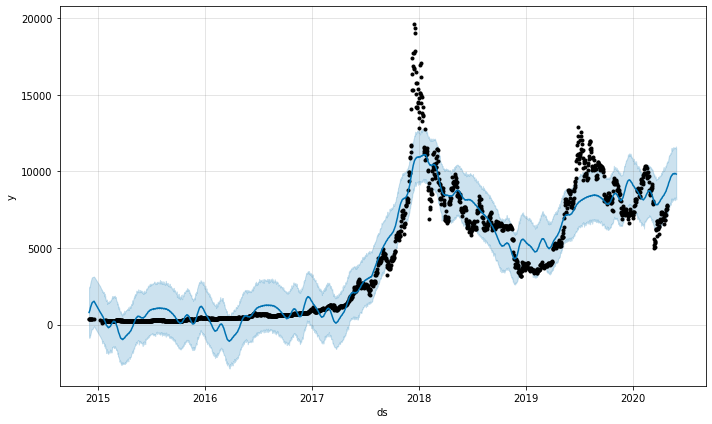

In [39]:
#from fbprophet.plot import add_changepoints_to_plot
fig1 = m.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), m, forecast)

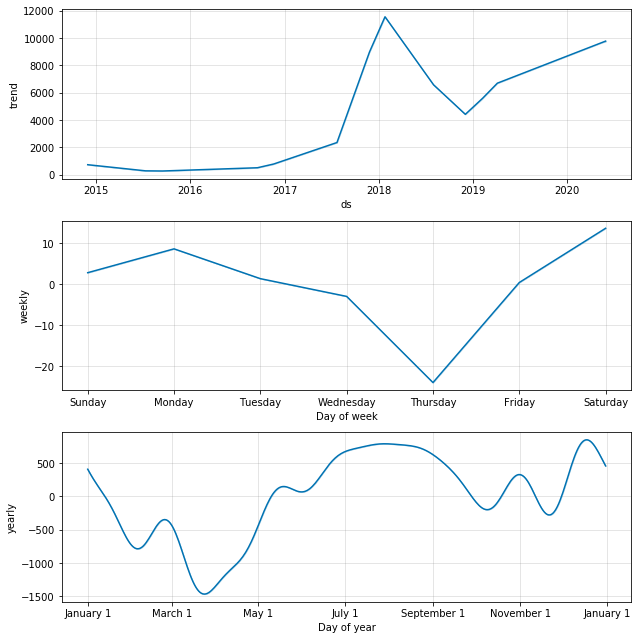

In [32]:
fig2 = m.plot_components(forecast)

reference https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima